Задание 1. Постройте экстраполяцию полиномами первой, второй и третьей степени

In [16]:
from numpy import *
from numpy.random import *
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import scipy as sp

In [17]:
# Данные для экстраполяции

delta = 1.0
x = linspace(-1,1, 11)
y = x**2 + delta*(rand(11) - 0.5)
x += delta*(rand(11)-0.5)

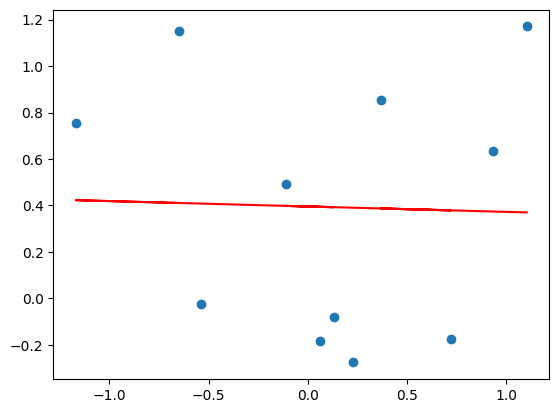

In [18]:
# Экстраполяция полинома первого порядка

m, c = np.linalg.lstsq(np.vstack([x, np.ones(11)]).T, y, rcond=None)[0]
plt.plot(x,y, 'o')
plt.plot(x, m*x + c, 'r')
plt.show()

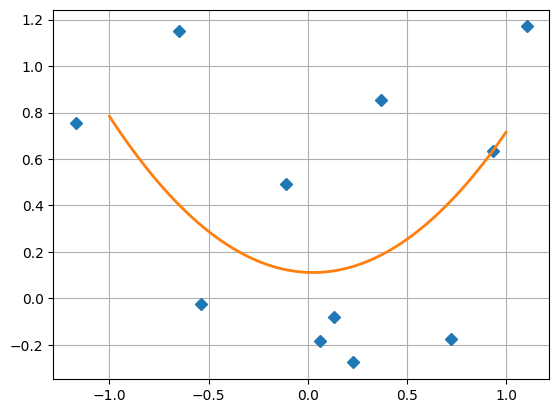

In [19]:
# Экстраполяция полинома второго порядка

m = vstack((x**2, x , ones(11))).T
s = np.linalg.lstsq(m,y,rcond=None)[0]

x_pec = linspace(-1,1,101)

plt.plot(x,y, 'D')

plt.plot(x_pec, s[0]*x_pec**2 + s[1]*x_pec+s[2], '-',lw=2)
plt.grid()
plt.show()

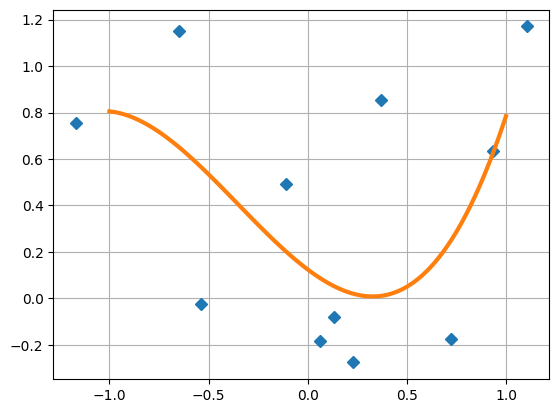

In [20]:
# Экстраполяция полинома третьего порядка

m = vstack((x**3, x**2, x, np.ones(11))).T
s = np.linalg.lstsq(m,y,rcond=None)[0]

x_pec = linspace(-1,1,101)

plt.plot(x,y,'D')

plt.plot(x_pec, s[0]*x_pec**3 + s[1]*x_pec**2 + s[2]*x_pec + s[3], '-', lw=3)
plt.grid()
plt.show()

Задание 2. Проверить гипотезу, что точечно заданная функция ложится на кривые вида:
1) 𝑓(𝑥,𝑏) = 𝑏0 + 𝑏1𝑥
2) 𝑓(𝑥,𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥2
3) 𝑓(𝑥,𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)
4) 𝑓(𝑥,𝑏) = 𝑏0 𝑥𝑏1

In [21]:
# добавляем шума к данным

beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

xdata = np.linspace(0, 5, 20)

y = f(xdata, *beta) # теоретически правильные значения точек (без шума)

# "зашумляем эти данные"
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)

lin_dev = sum(beta_cov[0]) # вычисление линейного отклонения

# вычисление квадратичного отклонения
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)

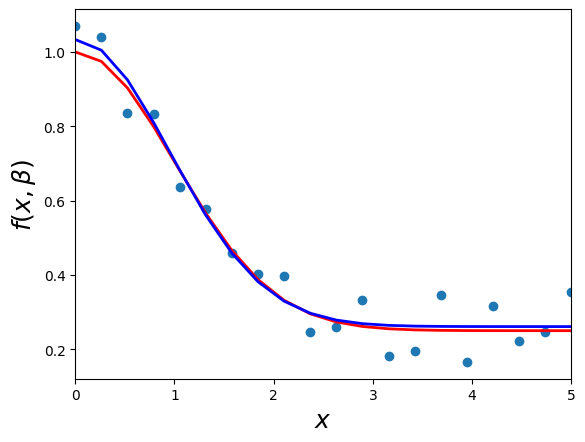

In [22]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt,), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

Задание 3. Постройте модель линейной регрессии для произвольных данных из двух столбцов. Найдите коэффициенты линии регрессии. Постройте прогноз

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [24]:
# Датасет
data = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')
dataset = pd.DataFrame(data)
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Text(0, 0.5, 'Заработная плата')

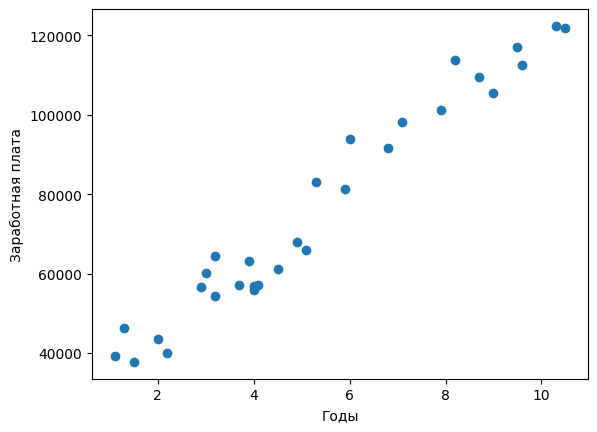

In [25]:
# точечная диаграмма 

plt.scatter (dataset['YearsExperience'], dataset['Salary'])
plt.xlabel('Годы')
plt.ylabel('Заработная плата')

In [26]:
# Разделение данных на обучающую и тестовую выборки

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Линейная регрессия
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Приведение коэффициентов для линии регрессии
print(regressor.intercept_)
print(regressor.coef_)

26780.09915062818
[9312.57512673]


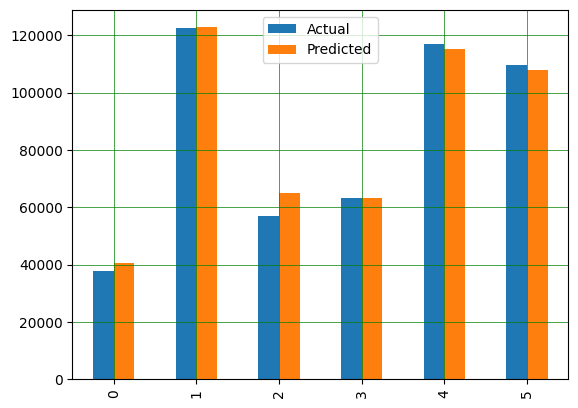

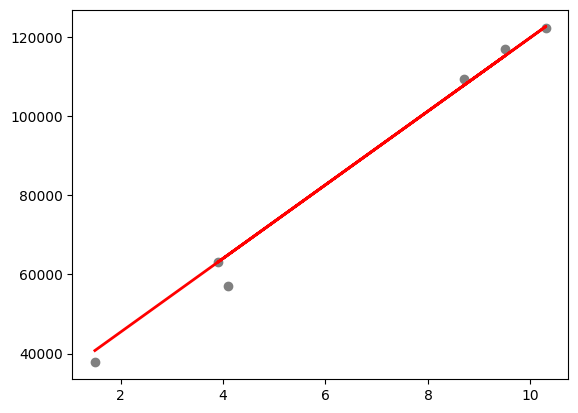

In [27]:
y_pred = regressor.predict(X_test)

# сравнение действительных данных с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# визуализация результата сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# построение линии регрессии с тестовыми данными
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

Задание 4. Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Найдите коэффициенты множественной регрессии. Постройте прогноз.

In [28]:
# Датасет

data = pd.read_csv('https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv')

d = np.array(data)
df = pd.DataFrame(d.transpose())
X = data[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = data['Petrol_Consumption']

In [29]:
# Деление на выборки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
coef_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

# Прогноз на тестовых данных 
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Prediced': y_pred})

In [30]:
# Оценка производительности алгоритма
print(f'Mean Squared Error {metrics.mean_squared_error(y_test, y_pred)}')

Mean Squared Error 4083.2558717453767


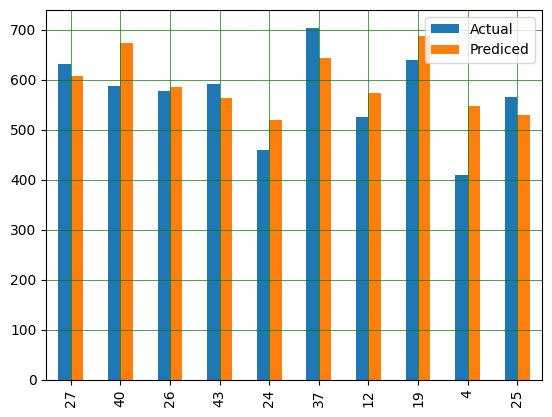

In [ ]:
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()